# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated GPCR activation

*Generated with AI assistance. Please verify all results and code before using in research.*

---

## Overview

This notebook introduces [Dandiset 001354](https://dandiarchive.org/dandiset/001354/0.250312.0036), which contains single-cell current clamp recordings from mouse hippocampal CA1 neurons. These cells were studied using programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). The dataset consists of NWB files recording responses to injected current steps and ramps, providing a valuable resource for reanalysis and exploration.

**Purpose:**  
To help researchers begin exploring the raw and metadata in this Dandiset, providing example workflows for data inspection and visualization.

---

## What does this notebook cover?
- An introduction to the data structure of Dandiset 001354
- Summarizing the NWB files available in the Dandiset
- How to load NWB data remotely (streaming) using the DANDI and remfile APIs
- How to inspect and visualize electrophysiological responses (CurrentClampSeries) and injected currents (CurrentClampStimulusSeries)
- How to access metadata about sweeps and stimulus protocols
- Example visualizations showing stimulus-response coupling in a representative cell/sweep

---

## Required packages

- dandi
- remfile
- pynwb
- h5py
- numpy
- matplotlib

> These packages are assumed to be pre-installed on your system.

---

## Important!
This notebook was generated with the assistance of AI and should be checked for correctness and appropriateness to your specific scientific questions.

---

## 1. Listing Assets and NWB Files in the Dandiset

Here, we use the DANDI API to list a few example NWB files in the dandiset. Each file represents data from a single recorded cell.

In [1]:
from dandi.dandiapi import DandiAPIClient
from itertools import islice

DANDISET_ID = "001354"
DANDISET_VERSION = "0.250312.0036"

# Create DANDI API client and get dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset(DANDISET_ID, DANDISET_VERSION)

# List first 10 NWB file assets
nwb_asset_paths = []
assets = dandiset.get_assets_by_glob("*.nwb")
for asset in islice(assets, 10):
    nwb_asset_paths.append(asset.path)

print("Example NWB files in dandiset:")
for path in nwb_asset_paths:
    print("  ", path)

Example NWB files in dandiset:
   sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
   sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
   sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb
   sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb
   sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb
   sub-PK-110/sub-PK-110_ses-20240723T173444_slice-2024-07-23-0010_cell-2024-07-23-0010_icephys.nwb
   sub-PK-110/sub-PK-110_ses-20240723T195515_slice-2024-07-23-0017_cell-2024-07-23-0017_icephys.nwb
   sub-PK-110/sub-PK-110_ses-20240723T143352_slice-2024-07-23-0003_cell-2024-07-23-0003_icephys.nwb
   sub-PK-110/sub-PK-110_ses-20240723T185020_slice-2024-07-23-0014_cell-2024-07-23-0014_icephys.nwb
   sub-PK-110/sub-PK-110_ses-20240723T160020_slice-2024-07-23-0006_ce

## 2. Loading and Exploring a Single NWB File

Next, we select a representative NWB file for in-depth exploration. NWB files follow a standard data structure, making it easier to find and visualize both electrophysiology data and metadata.

This example uses remote streaming (no download necessary) via `remfile`.

In [2]:
import h5py
import pynwb
import remfile

# Choose an NWB file to explore
example_nwb_path = nwb_asset_paths[0]

# Get asset download URL from DANDI
asset = next(dandiset.get_assets_by_glob(example_nwb_path))
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)

# Open the NWB file using pynwb
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwbfile = io.read()

print("NWB identifier:", nwbfile.identifier)
print("Session description:", nwbfile.session_description)
print("Session start time:", nwbfile.session_start_time)
print("Subject:", vars(nwbfile.subject))

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB identifier: pk2024_07_17_0009
Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 18:07:19-07:00
Subject: {'_AbstractContainer__container_source': '/home/magland/src/dandi-ai-notebooks-6/notebooks/dandisets/001354/0.250312.0036/4fba179c/gpt-4.1/h-2/<remfile.RemFile.RemFile object at 0x76f70d568620>', '_AbstractContainer__parent': root pynwb.file.NWBFile at 0x130801874970784
Fields:
  acquisition: {
    current_clamp-response-01-ch-0 <class 'pynwb.icephys.CurrentClampSeries'>,
    current_clamp-response-01-ch-1 <class 'pynwb.icephys.CurrentClampSeries'>,
    current_clamp-response-02-ch-0 <class 'pynwb.icephys.CurrentClampSeries'>,
    current_clamp-response-02-ch-1 <class 'pynwb.icephys.CurrentClampSeries'>,
    current_clamp-response-03-ch-0 <class 'pynwb.icephys.CurrentClampSeries'>,
    current_clamp-response-03-ch-1 <class 'pynwb.icephys.CurrentClampSeries'>,
    current_clamp-response-04-ch-0 <class 'pynwb.icephys.CurrentClampSeries'

### 2.1. NWB Data Structure: Acquisition and Stimulus Groups

- The **acquisition** group holds the raw voltage responses (CurrentClampSeries)
- The **stimulus** group holds the injected current protocols (CurrentClampStimulusSeries)

Let's preview the names and descriptions for the first few sweeps in each group.

In [3]:
# List first 5 CurrentClampSeries in acquisition
ccs_list = [(k, v.description) for k, v in islice(nwbfile.acquisition.items(), 5) if v.neurodata_type == 'CurrentClampSeries']
print("First 5 CurrentClampSeries in acquisition:")
for k, desc in ccs_list:
    print(f"  {k}: {desc}")

# List first 5 CurrentClampStimulusSeries in stimulus
ccss_list = [(k, v.description) for k, v in islice(nwbfile.stimulus.items(), 5) if v.neurodata_type == 'CurrentClampStimulusSeries']
print("\nFirst 5 CurrentClampStimulusSeries in stimulus:")
for k, desc in ccss_list:
    print(f"  {k}: {desc}")

First 5 CurrentClampSeries in acquisition:
  current_clamp-response-01-ch-0: Response to: ramp
  current_clamp-response-01-ch-1: Response to: ramp
  current_clamp-response-02-ch-0: Response to: ramp
  current_clamp-response-02-ch-1: Response to: ramp
  current_clamp-response-03-ch-0: Response to: ramp

First 5 CurrentClampStimulusSeries in stimulus:
  stimulus-01-ch-0: Stim type: ramp
  stimulus-01-ch-1: Stim type: ramp
  stimulus-02-ch-0: Stim type: ramp
  stimulus-02-ch-1: Stim type: ramp
  stimulus-03-ch-0: Stim type: ramp


## 3. Visualizing Raw Voltage and Injected Current

We now load and plot the voltage and injected current traces for a single sweep, using:
- The **CurrentClampSeries** corresponding to `'current_clamp-response-01-ch-0'`
- The **CurrentClampStimulusSeries** corresponding to `'stimulus-01-ch-0'`

We overlay them to visualize the direct relationship between injected current and the neuron's voltage response. Conversion factors in NWB are carefully applied for correct physical units.

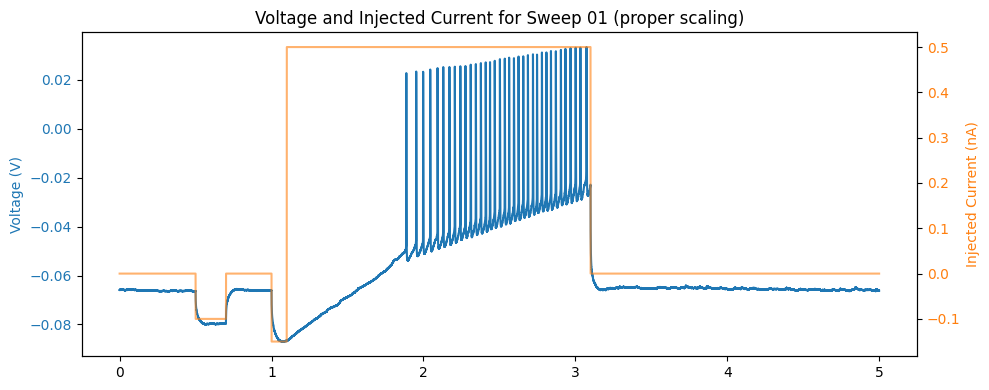

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load sweep traces
ccs = nwbfile.acquisition['current_clamp-response-01-ch-0']
ccss = nwbfile.stimulus['stimulus-01-ch-0']

# Voltage in volts (conversion factor applied)
voltage = ccs.data[:] * ccs.conversion
sampling_rate = ccs.rate  # Hz
time = np.arange(len(voltage)) / sampling_rate

# Current in nA (apply .data, .conversion, and 1e9 scale)
current_nA = ccss.data[:] * ccss.conversion * 1e9
current_time = np.arange(len(current_nA)) / ccss.rate

# Plot overlay with twin axes (best for comparing traces)
fig, ax1 = plt.subplots(figsize=(10, 4))
color1 = 'tab:blue'
color2 = 'tab:orange'
ax1.plot(time, voltage, color=color1, label='Voltage (V)')
ax1.set_ylabel('Voltage (V)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
ax2.plot(current_time, current_nA, color=color2, label='Current (nA)', alpha=0.6)
ax2.set_ylabel('Injected Current (nA)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Voltage and Injected Current for Sweep 01 (proper scaling)')
plt.xlabel('Time (s)')
fig.tight_layout()
plt.show()

**Interpretation:**  
The plot above displays the voltage (blue, left axis) and injected current (orange, right axis, in nA) for a single sweep. Note how the neuron fires action potentials during the ramp phase of the stimulus, after several subthreshold or step-form tests.

This illustrates how to directly relate stimulus protocol to electrophysiological response.

## 4. Accessing and Exploring Sweep Metadata

Beyond the raw time series, detailed metadata tables in the NWB file annotate each sweep—such as protocol type, sweep grouping, and links between stimulus and response.

The `intracellular_recordings` table connects each voltage trace (response) with the corresponding current injection (stimulus), electrode, and sweep indices. The `icephys_sequential_recordings` table provides protocol-level grouping and annotations such as stimulus type.

Example: Previewing stimulus/response pairings and stimulus type.

In [5]:
# Convert intracellular_recordings table to a dataframe and show first 5 rows
df = nwbfile.intracellular_recordings.to_dataframe()
print("Columns in intracellular_recordings table:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# Preview protocol annotation from sequential recordings table
df_seq = nwbfile.icephys_sequential_recordings.to_dataframe()
print("\nSequential recordings protocol grouping (first 5 rows):")
print(df_seq[['stimulus_type']].head())

Columns in intracellular_recordings table: [('electrodes', 'id'), ('electrodes', 'electrode'), ('stimuli', 'id'), ('stimuli', 'stimulus'), ('responses', 'id'), ('responses', 'response')]

First 5 rows:
                               electrodes  \
                                       id   
(intracellular_recordings, id)              
0                                       0   
1                                       1   
2                                       2   
3                                       3   
4                                       4   

                                                                                   \
                                                                        electrode   
(intracellular_recordings, id)                                                      
0                               electrode-0 pynwb.icephys.IntracellularElectro...   
1                               electrode-1 pynwb.icephys.IntracellularElectro...   
2           


Sequential recordings protocol grouping (first 5 rows):
   stimulus_type
id              
0           ramp


**Interpretation:**  
- The `intracellular_recordings` table gives sweep-by-sweep pairing of data and protocol, referencing each relevant acquisition and stimulus object.
- The `stimulus_type` column in the sequential recordings table tells us that the current protocol used for this block of sweeps is a "ramp".

This metadata lays the groundwork for systematic, scalable re-analysis of stimulus-evoked neuronal responses.

## 5. Summary and Next Steps

This notebook has demonstrated:
- How to find and list NWB files in Dandiset 001354
- How to stream, inspect, and visualize voltage and current data for a representative sweep
- How to access sweep- and protocol-level metadata for systematic analysis

**What next?**
- Loop over files, cells, or sweeps to compare responses across conditions or genotypes
- Quantify action potential output, input resistance, or other physiological properties
- Leverage metadata tables for grouping, filtering, or linking related sweeps

For more on the data, visit the Dandiset's [landing page](https://dandiarchive.org/dandiset/001354/0.250312.0036) or consult the associated publication.

---

*Remember: Please double-check all code and results, especially when adapting for novel analyses or questions!*